In this notebook, we demonstrate how biological insights can be gained from the ML model using Principal Component Analysis of Proteomics (PCAP)

* Fit transform [PLS Regression](https://en.wikipedia.org/wiki/Partial_least_squares_regression) with two principal components
* The features (independent variables) are the proteins/enzymes involved in the reactions
* The dependent variable here is Limonene

In [1]:
import sys
sys.path.append("../tool")

from learn_biological import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

In [2]:
# Define states and controls
proteins = ['AtoB', 'HMGS', 'HMGR', 'MK', 'PMK', 'PMD', 'Idi','GPPS', 'LS']
metabolites = ['GPPS', 'LS', 'Acetyl-CoA', 'Acetoacetyl-CoA', 'HMG-CoA', 'Mev', 'MevP','MevPP', 'IPP', 'DMAPP', 'GPP', 'Limonene']

In [3]:
# Set up the df of features,targets and predicted columns
df = pd.read_csv('../data/predicted_data.csv')
df = df.set_index(['Strain','Time'])

In [4]:
# Define variables
independent_vars = proteins
actual_dependent_var = 'Limonene'
predicted_dependent_var = 'Limonene.1'

# Redefine X,y,y_p
X = df[independent_vars]
y = df[actual_dependent_var]
y_p = df[predicted_dependent_var]

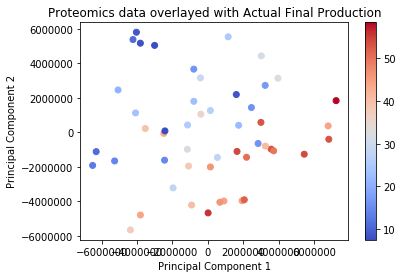

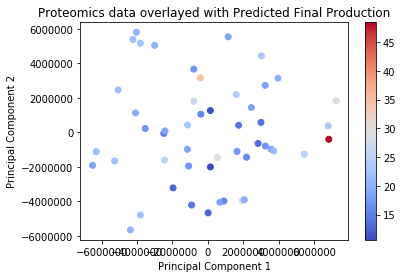

In [5]:
# Plot PCA
plot_pca(X,y,y_p)

,AtoB,HMGS,HMGR,MK,PMK,PMD,Idi,GPPS,LS
0,-0.079543,-0.013711,0.600973,-0.561748,0.347141,0.394747,-0.074518,-0.179998,-0.049719
1,-0.025510,0.064287,0.322604,0.258351,0.095987,0.109309,0.702387,0.278053,0.482260


[[-7064881.30858449   -14251.58826995  3237182.50207768]
 [  269239.04402979  -190092.09342406 -4959743.05507771]]
[-7064881.30858449   269239.04402979]
[ -14251.58826995 -190092.09342406]
[ 3237182.50207768 -4959743.05507771]


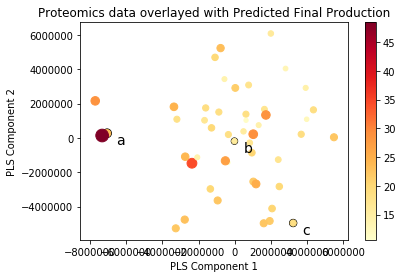

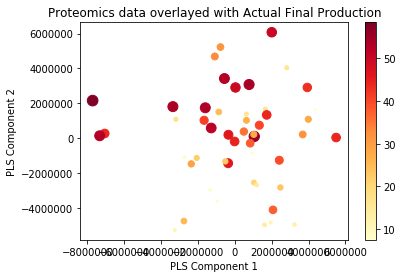

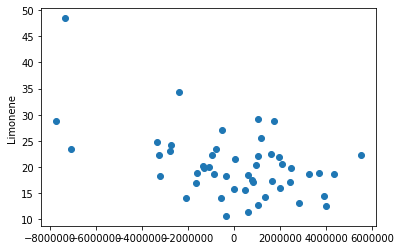

In [7]:
# Plot CCA
plot_cca(X,y,y_p,highlight_indecies= [2,1,28])

NOTE that in the PLS components above:
* the second principal component involves overexpression of LS, and IDI
* the first principal component involves overexpression of HMGR and underexpression of MK

In the following cell, we show the full data as generated by Michaelis-Menten Kinetic ODE for training the ML model.

In [8]:
tsdf = pd.read_csv('../data/full_timeseries_predicted.csv')
display(df.reset_index().sort_values('Limonene.1'))

,Strain,Time,AtoB,HMGS,HMGR,MK,PMK,PMD,Idi,GPPS,LS,Limonene,Limonene.1
34,3377,69,5.926473e+06,7.989306e+06,5.894520e+06,3.729601e+06,4.761092e+06,4.386285e+06,1.475749e+06,7.362698e+06,7.392274e+06,0.046160,0.010606
46,4254,69,2.641246e+06,4.717867e+06,6.024744e+06,5.331594e+06,9.805328e+06,4.632462e+06,4.984441e+06,8.695452e+06,4.147104e+06,0.026884,0.011293
21,2275,69,6.442751e+06,9.002996e+06,6.631622e+06,1.642760e+06,7.789306e+06,7.719690e+06,5.714156e+06,4.113871e+06,4.292400e+06,0.028059,0.012405
24,2470,69,3.993804e+06,9.233155e+06,6.086413e+06,5.341812e+06,9.076154e+06,3.614046e+06,2.604519e+06,1.479142e+06,9.341756e+06,0.056022,0.012731
4,421,69,1.457053e+06,7.816741e+06,8.234266e+06,1.803335e+06,9.469114e+06,2.652185e+06,9.645477e+06,8.771075e+06,2.417513e+06,0.016111,0.013122
39,3740,69,2.675863e+06,6.200234e+06,7.237677e+06,7.480112e+06,7.117685e+06,5.346569e+06,5.110414e+06,7.637373e+06,8.642417e+06,0.053085,0.013976
38,3723,69,1.795929e+06,8.089002e+06,4.100562e+06,6.294429e+06,7.698795e+06,2.918365e+06,5.372484e+06,6.607267e+06,3.378702e+06,0.022221,0.014115
37,3703,69,7.408448e+06,3.960825e+06,1.734006e+06,1.535192e+06,8.267712e+06,7.510189e+06,8.853504e+06,1.357129e+06,6.558708e+06,0.040399,0.014203
33,3174,69,8.741548e+06,5.801273e+06,9.471622e+06,4.936268e+06,7.861117e+06,8.785788e+06,3.657470e+06,5.432179e+06,6.984913e+06,0.043241,0.014424
14,1092,69,5.461887e+06,1.391992e+06,6.586154e+06,3.874067e+06,6.808475e+06,3.738435e+06,4.997220e+06,6.680690e+06,5.853272e+06,0.035742,0.015626


* Fit transform [PLS Regression](https://en.wikipedia.org/wiki/Partial_least_squares_regression) with two principal components
* The features (independent variables) are the proteins/enzymes involved in the reactions
* The dependent variable here is Limonene

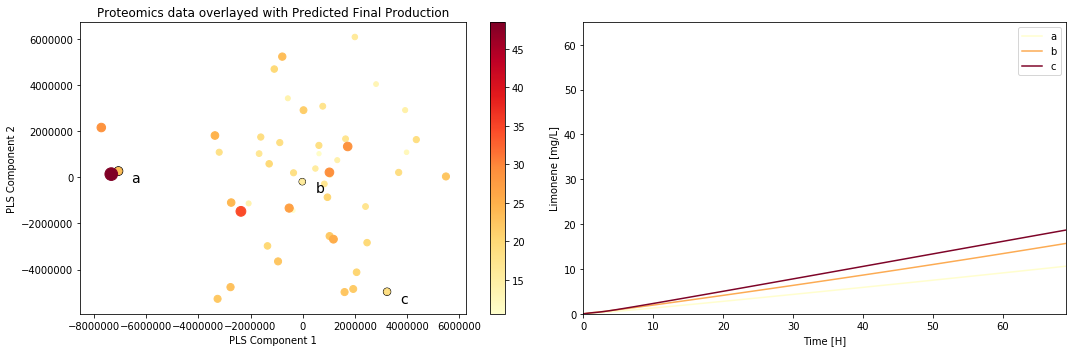

In [11]:
cca = PLSRegression(2,scale=False)
X_cca,y_p_cca = cca.fit_transform(X,y_p)
X_cca = np.transpose(X_cca)

## Build up Fig.10 resulted in the paper!

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

## Left plot
#strains_to_plot = [184,61,3276]
strains_to_plot = [23,39,70]
highlight_indecies = [2,1,28]

plt.scatter(*X_cca[:,highlight_indecies],color='k',s=y_p[highlight_indecies]**1.5*21000)
ax = plt.gca()

for point,label in zip(np.transpose(X_cca[:,highlight_indecies]),['a','b','c']):
    ax.annotate(label,((point[0],point[1])),xytext=(point[0]+500000,point[1]),fontsize=14,horizontalalignment='left',verticalalignment='top')
    
plt.scatter(*X_cca,c=y_p*1000,cmap=plt.cm.get_cmap('YlOrRd'),s=y_p**1.5*15000)
plt.colorbar()

plt.title('Proteomics data overlayed with Predicted Final Production')
plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')

## Right plot

strains_to_plot = [3377,88,8]
colors = ['#FFFECE','#FCAB53','#7E0428']

plt.subplot(1,2,2)
for color,strain in zip(colors,strains_to_plot):
    strain_df = tsdf.loc[tsdf['Strain']==strain]
    plt.plot(strain_df['Time'],strain_df['Limonene']*1000,color=color)
    
plt.xlim([0,69])
plt.ylim([0,65])
plt.xlabel('Time [H]')
plt.ylabel('Limonene [mg/L]')
plt.legend(['a','b','c'])

plt.tight_layout()
plt.savefig('../figures/fig10.png',dpi = 300)
plt.show()

- Left: Final Limonene Production predicted by ML plotted in the phase space of PLS components, which can be mapped back to the proteomics phase space. PLS component 1 corresponds to the direction in the proteomics phase space that aligns the most with increasing Limonene production.
- Right: samples of simulated virtual strains generated by ML model